In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_hilbert(k):
    n = np.arange(0, k).reshape(1, -1)
    return 1 / (n.T + 1 + n)

In [3]:
def get_random(k):
    return np.random.randn(k, k)

In [4]:
def get_distance(Ma, Mb):
    return np.sqrt(np.sum((Ma - Mb)**2))

In [5]:
hdata = np.zeros((10, 3))
rdata = np.zeros((10, 3))

for i, k in enumerate(range(3, 12 + 1)):
    H = get_hilbert(k)
    R = get_random(k)
    hdata[i, 0] = k
    hdata[i, 1] = get_distance(np.eye(k), np.linalg.inv(H) @ H)
    hdata[i, 2] = np.linalg.cond(H)
    rdata[i, 0] = k
    rdata[i, 1] = get_distance(np.eye(k), np.linalg.inv(R) @ R)
    rdata[i, 2] = np.linalg.cond(R)

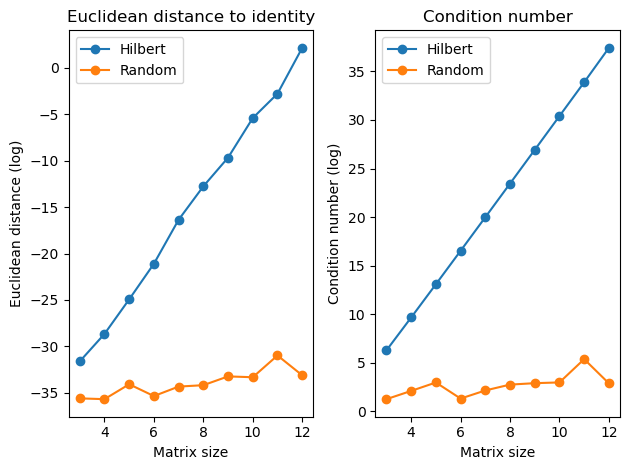

In [6]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title("Euclidean distance to identity")
axes[0].set_xlabel("Matrix size")
axes[0].set_ylabel("Euclidean distance (log)")
axes[0].plot(hdata[:, 0], np.log(hdata[:, 1]), label="Hilbert", marker="o")
axes[0].plot(rdata[:, 0], np.log(rdata[:, 1]), label="Random", marker="o")
axes[0].legend()

axes[1].set_title("Condition number")
axes[1].set_xlabel("Matrix size")
axes[1].set_ylabel("Condition number (log)")
axes[1].plot(hdata[:, 0], np.log(hdata[:, 2]), label="Hilbert", marker="o")
axes[1].plot(rdata[:, 0], np.log(rdata[:, 2]), label="Random", marker="o")
axes[1].legend()

fig.tight_layout()
plt.show()